https://github.com/joshuatochinwachi/machine-learning-zoomcamp/blob/master/cohorts/2025/03-classification/homework.md

In [156]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [157]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [158]:
df = pd.read_csv(data)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [159]:
print(df.shape)
print()
print(df.columns)
print()
print(df.dtypes)
print()
print(df.info())

(1462, 9)

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_

In [160]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

## Data Prep

In [161]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique()[:5])
    print()

lead_source
5
['paid_ads' 'social_media' 'events' 'referral' 'organic_search']

industry
7
[nan 'retail' 'healthcare' 'education' 'manufacturing']

number_of_courses_viewed
10
[1 5 2 3 0]

annual_income
1267
[79450. 46992. 78796. 83843. 85012.]

employment_status
4
['unemployed' 'employed' nan 'self_employed' 'student']

location
7
['south_america' 'australia' 'europe' 'africa' 'middle_east']

interaction_count
12
[4 1 3 6 2]

lead_score
101
[0.94 0.8  0.69 0.87 0.62]

converted
2
[1 0]



In [162]:
categorical_columns = list(df.dtypes[df.dtypes == object].index)
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [163]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [164]:
numerical_columns = list(df.dtypes[df.dtypes != object].index)
if 'converted' in numerical_columns:
    numerical_columns.remove('converted')
numerical_columns

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [165]:
df[categorical_columns] = df[categorical_columns].fillna('NA')
df[numerical_columns] = df[numerical_columns].fillna(0.0)
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [166]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


### Question 1

In [167]:
df.industry.mode()[0]

'retail'

### Question 2

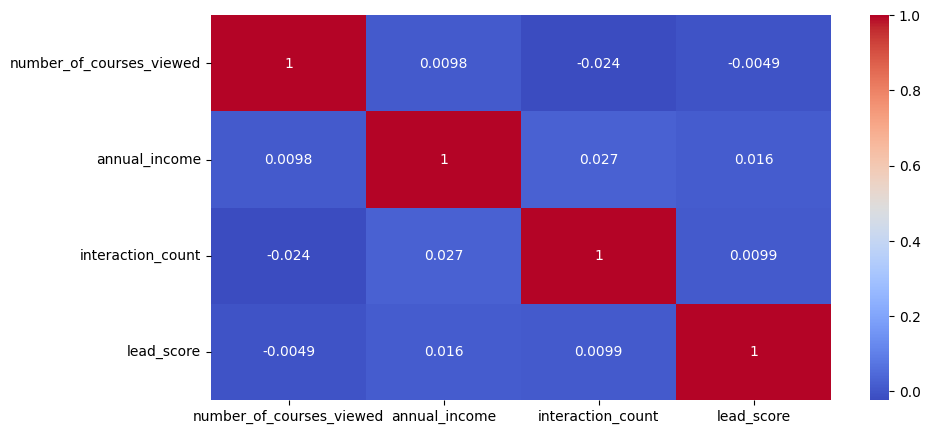

In [168]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', alpha=1)
plt.show()

##### Validation Framework

In [169]:
# spliting the data set to train, validation and test sets 

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

# 60% of the data is used to train the model
# 20% of the data is used to validate the model
# 20% of the data is used to test the model

(876, 9)
(293, 9)
(293, 9)


In [170]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [171]:
y_train = df_train.converted.values
y_val = df_val.converted.values 
y_test = df_test.converted.values

In [172]:
del df_train['converted']
del df_val['converted'] 
del df_test['converted']

### Question 3

In [173]:
# calculating the mutual information between the feature (categorical) and the target variable (converted) 

def mutual_info(series): 
    return mutual_info_score(series, y_train)

In [174]:
mi = df_train[categorical_columns].apply(mutual_info)
mi.sort_values(ascending= False)

lead_source          0.035396
employment_status    0.012938
industry             0.011575
location             0.004464
dtype: float64

### Question 4
- Training the Logistic regression model

In [175]:
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient= "records")
val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient= "records")

print(train_dict[:5])
print()
print(val_dict[:5])

[{'lead_source': 'paid_ads', 'industry': 'retail', 'employment_status': 'student', 'location': 'middle_east', 'number_of_courses_viewed': 0, 'annual_income': 58472.0, 'interaction_count': 5, 'lead_score': 0.03}, {'lead_source': 'organic_search', 'industry': 'manufacturing', 'employment_status': 'student', 'location': 'middle_east', 'number_of_courses_viewed': 3, 'annual_income': 71738.0, 'interaction_count': 6, 'lead_score': 0.77}, {'lead_source': 'paid_ads', 'industry': 'technology', 'employment_status': 'employed', 'location': 'north_america', 'number_of_courses_viewed': 3, 'annual_income': 81973.0, 'interaction_count': 2, 'lead_score': 0.59}, {'lead_source': 'NA', 'industry': 'technology', 'employment_status': 'employed', 'location': 'europe', 'number_of_courses_viewed': 1, 'annual_income': 74956.0, 'interaction_count': 3, 'lead_score': 0.34}, {'lead_source': 'organic_search', 'industry': 'retail', 'employment_status': 'student', 'location': 'australia', 'number_of_courses_viewed': 

In [176]:
# one hot encoding the categorical features / columns

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [177]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [ ]:
# 